## COVID-19 RADIOGRAPHY BASED CLASSIFICATION USING MULTIPROTOTYPE FUZZY LOGIC
------
#### Batch 1 Grp 2 EDI :
- 12011104 - Tanmay Mutalik
- 12011328 - Vishal Govindani
- 12011078 - Kuhu Mukhopadhyay
- 12011385 - Amey Chopde

------

## About the Dataset:
#### COVID-19 CHEST X-RAY DATABASE:


        - A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal and other lung infection dataset is released in stages. In the first release we have released 219 COVID-19, 1341 normal and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection) and 1345 Viral Pneumonia images and corresponding lung masks. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients. 

##### Formats
        - All the images are in Portable Network Graphics (PNG) file format and resolution are 299*299 pixels.

##### Objective
       -  Researchers can use this database to produce useful and impactful scholarly work on COVID-19, which can help in tackling this pandemic.

##### COVID-19 data:
>
>COVID data are collected from different publicly accessible dataset, online sources and published papers.
>- 2473 CXR images are collected from padchest dataset[1].
>- 183 CXR images from a Germany medical school[2].
>- 559 CXR image from SIRM, Github, Kaggle & Tweeter[3,4,5,6]
>- 400 CXR images from another Github source[7].


##### Normal images:
>10192 Normal data are collected from from three different dataset.
>- 8851 RSNA [8]
>- 1341 Kaggle [9]


##### Lung opacity images:
>6012 Lung opacity CXR images are collected from Radiological Society of North America (RSNA) CXR dataset  [8]

##### Viral Pneumonia images:bo
>1345 Viral Pneumonia data are collected from  the Chest X-Ray Images (pneumonia) database [9]

##### Dataset Link:


[COVID-19 Chest X-Ray Database](https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database)


## Reference:
[1]https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711

[2]https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png

[3]https://sirm.org/category/senza-categoria/covid-19/

[4]https://eurorad.org

[5]https://github.com/ieee8023/covid-chestxray-dataset

[6]https://figshare.com/articles/COVID-19_Chest_X-Ray_Image_Repository/12580328

[7]https://github.com/armiro/COVID-CXNet  

[8]https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

[9] https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

# Code

In [66]:
# import the necessary packages
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import ast
import pywt

` Defining Functions for basic image processing ` 

In [2]:
# functions for image processing
#! add contrast to the image 
def contrast(img, alpha, beta):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    return new_img

#! add brightness to the image
def brightness(img, alpha, beta):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    return new_img

#! add gamma to the image
def gamma(img, gamma):
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img, gamma_table)

#! add blur to the image
def blur(img, ksize):
    return cv2.blur(img, (ksize, ksize))

#! add sharpen to the image
def sharpen(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

#! add emboss to the image
def emboss(img, ksize):
    kernel = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
    return cv2.filter2D(img, -1, kernel)

#! add edge detection to the image
def edge_detection(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

` Defining functions for file handling `

In [3]:
def formatString(string):
    string = string.replace("array([", "[")
    string = string.replace("]),array([", "],[")
    string = string.replace("])", "]")
    return string


def convertToArray(string):
    listArr = ast.literal_eval(string)
    return listArr


def tupleToList(listArr):
    array = []
    for i in range(len(listArr)):
        array.append(listArr[i])
    return array

def loadFile(path):
    with open(path, 'r') as f:
        vector = f.read()
        vector = formatString(vector)
        vector = convertToArray(vector)
        vector = tupleToList(vector)
        f.close()
    return vector

        


In [4]:

#! function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


#! function to calculate euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    distance = 0.0
    for i in range(len(vector1)):
        distance += (vector1[i] - vector2[i])**2
    return np.sqrt(distance)


#! function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

` Defining functions for prototypes`

In [123]:
def getPrototype(test_vector, prototypes):
    min_distance = euclidean_distance(test_vector, prototypes[0])
    index = 0
    for i in range(1, len(prototypes)):
        distance = euclidean_distance(test_vector, prototypes[i])
        if distance < min_distance:
            min_distance = distance
            index = i
    return index, min_distance


def assignClass(covid_membership, normal_membership, pneumonia_membership):
    if covid_membership>normal_membership and covid_membership> pneumonia_membership:
        return "covid"

    elif normal_membership>covid_membership and pneumonia_membership:
        return "normal"

    elif pneumonia_membership>normal_membership and covid_membership:
        return "pneumonia"

    elif normal_membership == covid_membership == pneumonia_membership:
        return "\nCovid, Normal, Pneumonia have same membership.Cannot assign a single class"
    
    elif normal_membership == covid_membership:
        return "\nNormal and Covid have same membership.Cannot assign a single class "
    
    elif normal_membership == pneumonia_membership:
        return "\nNormal and Pneumonia have same membership.Cannot assign a single class"
    elif covid_membership == pneumonia_membership:
        return "\nPneumonia and Covid have same membership.Cannot assign a single class"
    else:
        return "\n Some error occurred"


def accuracy(lengthTestVectors, lengthCorrectlyClassified):
    return (lengthCorrectlyClassified/lengthTestVectors)*100


def getDegreeOfMembership(className, covid_class_parameter, normal_class_parameter, pneumonia_class_parameter):
    degree = 0
    sum = covid_class_parameter + normal_class_parameter + pneumonia_class_parameter
    if className == "covid":
        element = covid_class_parameter
    elif className == "normal":
        element = normal_class_parameter
    elif className == "pneumonia":
        element = pneumonia_class_parameter

    degree = (sum - element) / sum
    return degree


### Defining a process to check the validity of input image

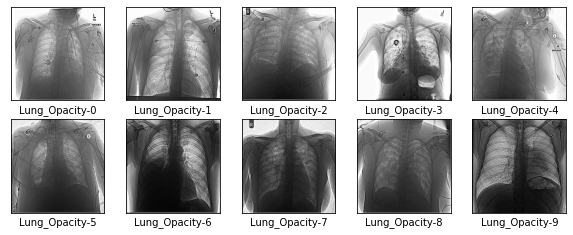

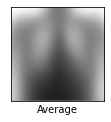

In [140]:
# read sharpen images from the folder sharpen_images of lung_opacity
lung_opacity_sharpen_length =len(os.listdir('./COVID-19_Radiography_Dataset/Lung_Opacity/sharpen_images/'))
lung_opacity_sharpen = []

for i in range(1, lung_opacity_sharpen_length):
    img = cv2.imread('./COVID-19_Radiography_Dataset/Lung_Opacity/sharpen_images/Lung_Opacity-'+str(i)+'.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lung_opacity_sharpen.append(img)

# display the 10 sharpen images
plt.figure(figsize=(10,10))
for i in range(0, 10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lung_opacity_sharpen[i], cmap=plt.cm.binary)
    plt.xlabel('Lung_Opacity-'+str(i))
plt.show()

# get the average image
lung_opacity_average = np.mean(lung_opacity_sharpen, axis=0)

# display the average image
plt.figure(figsize=(10,10))
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(lung_opacity_average, cmap=plt.cm.binary)
plt.xlabel('Average')
plt.show()


In [141]:
def is_lung_image(img):
    std = np.std(img)
    std_average = np.std(lung_opacity_average)
    # check if the input image is similar to the average image
    if std > std_average:
        return True
    else:
        return False

## Load the Images

` Normal Lungs Images `
    
` Pneumonia Lungs Images `

` COVID Lungs Images `


In [6]:

covid_images_length = len(os.listdir('./COVID-19_Radiography_Dataset/COVID/sharpen_images/'))
normal_images_length = len(os.listdir('./COVID-19_Radiography_Dataset/Normal/sharpen_images/'))
viral_pneumonia_images_length = len(os.listdir('./COVID-19_Radiography_Dataset/Viral Pneumonia/sharpen_images/'))

#! read all images of normal
normal_images = []
for i in range(1, normal_images_length+1):
    normal_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/Normal/sharpen_images/Normal-'+str(i)+'.png'))

#! read all images of viral pneumonia
viral_pneumonia_images = []
for i in range(1, viral_pneumonia_images_length+1):
    viral_pneumonia_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/Viral Pneumonia/sharpen_images/Viral Pneumonia-'+str(i)+'.png'))

#! read all images of covid
covid_images = []
for i in range(1, covid_images_length+1):
    covid_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/COVID/sharpen_images/COVID-'+str(i)+'.png'))

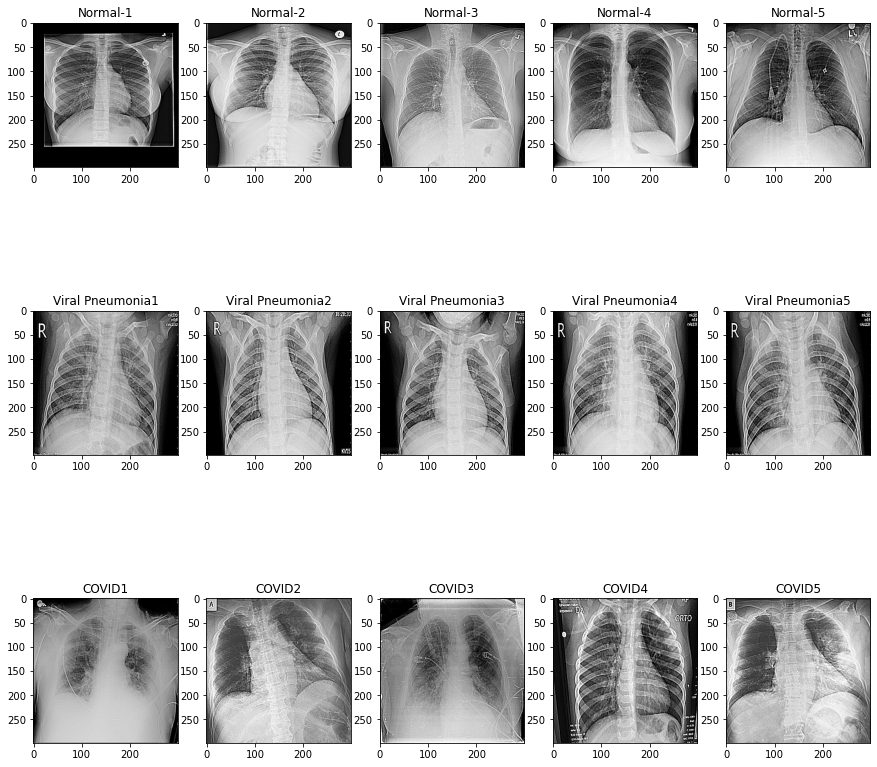

In [7]:

#! Display 5 images from each class with labels with numbers
fig, axs = plt.subplots(3, 5, figsize=(15, 15))
for i in range(5):
    axs[0, i].imshow(normal_images[i])
    axs[0, i].set_title('Normal-'+str(i+1))
    axs[1, i].imshow(viral_pneumonia_images[i])
    axs[1, i].set_title('Viral Pneumonia'+str(i+1))
    axs[2, i].imshow(covid_images[i])
    axs[2, i].set_title('COVID'+str(i+1))
plt.show()

## Load the Vectors

` Normal Lungs Vector `
    
` Pneumonia Lungs Vector `

` COVID Lungs Vector `


In [8]:
normal_images_vector = []
covid_images_vector = []
pneumonia_images_vector = []

#! get vector of all images of normal
normal_images_vector = loadFile('./COVID-19_Radiography_Dataset/Normal/normal_images_vector.txt')
#! get vector of all images of covid
covid_images_vector = loadFile('./COVID-19_Radiography_Dataset/COVID/covid_images_vector.txt')
#! get vector of all images of viral pneumonia
pneumonia_images_vector = loadFile('./COVID-19_Radiography_Dataset/Viral Pneumonia/viral_pneumonia_images_vector.txt')

#! print vector of all classes
print("No. of Normal Images Vector: ", len(normal_images_vector))
print("No. of COVID Images Vector: ", len(covid_images_vector))
print("No. of Pneumonia Images Vector: ", len(pneumonia_images_vector))

No. of Normal Images Vector:  10192
No. of COVID Images Vector:  3616
No. of Pneumonia Images Vector:  1345


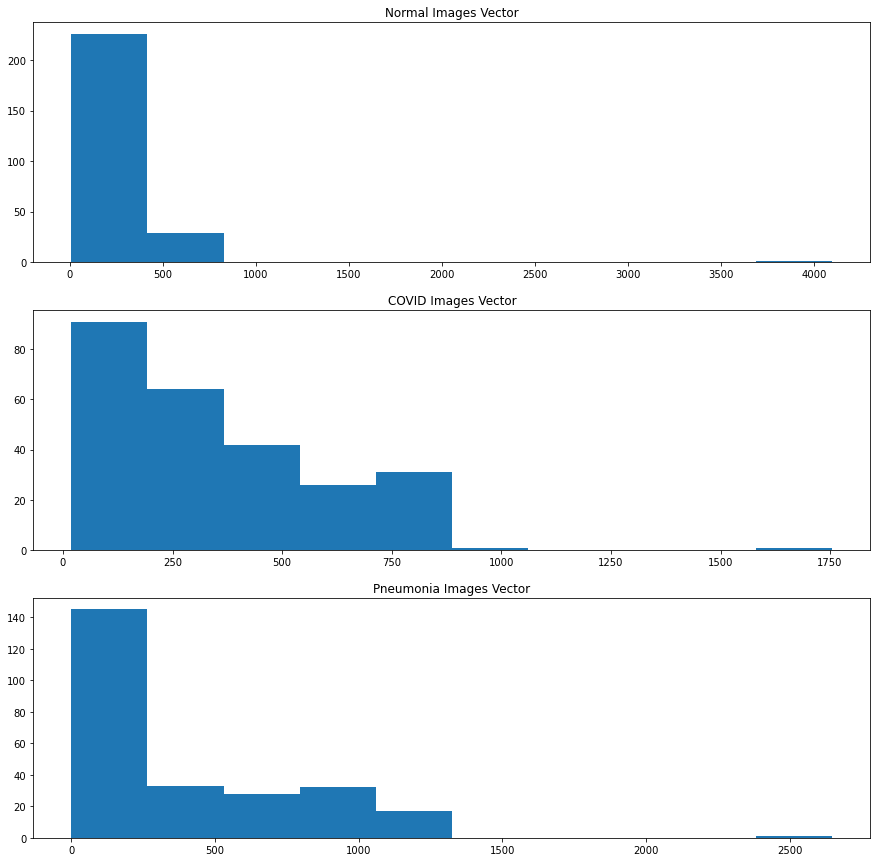

In [9]:

#! display the data distribution of each class
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
axs[0].hist(normal_images_vector[11])    
axs[0].set_title('Normal Images Vector')
axs[1].hist(covid_images_vector[11])
axs[1].set_title('COVID Images Vector')
axs[2].hist(pneumonia_images_vector[11])
axs[2].set_title('Pneumonia Images Vector')
plt.show()



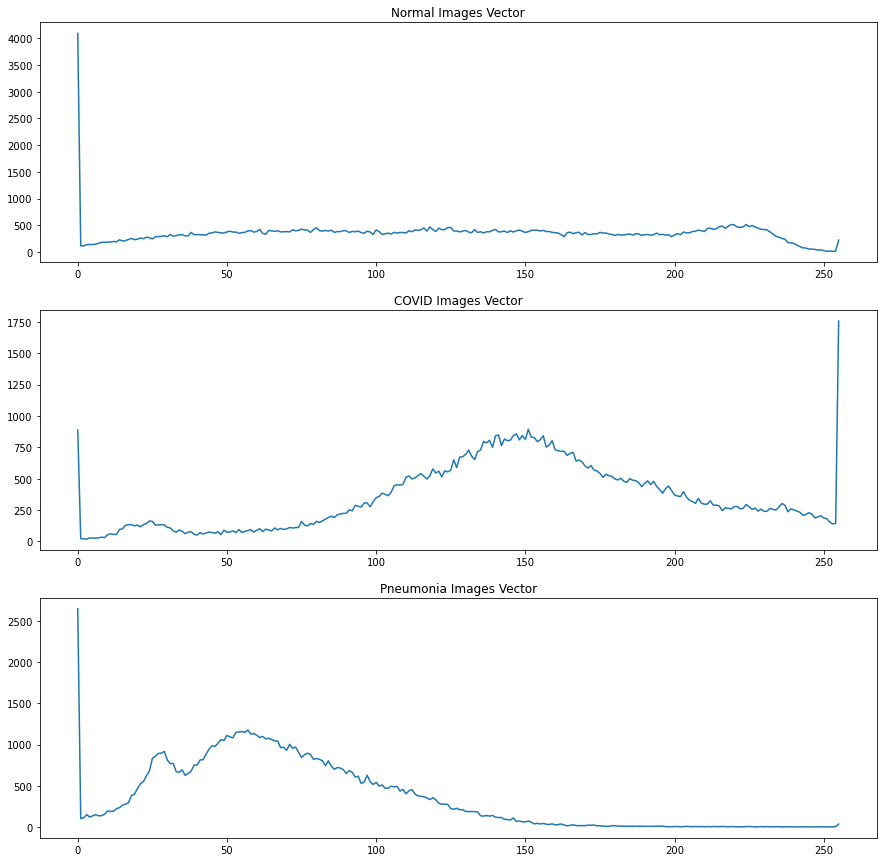

In [10]:

#! histogram of a vector in each class

# add some space between subplots
fig.subplots_adjust(hspace=5)
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
axs[0].plot(normal_images_vector[11])
axs[0].set_title('Normal Images Vector')
axs[1].plot(covid_images_vector[11])
axs[1].set_title('COVID Images Vector')
axs[2].plot(pneumonia_images_vector[11])
axs[2].set_title('Pneumonia Images Vector')
plt.show()


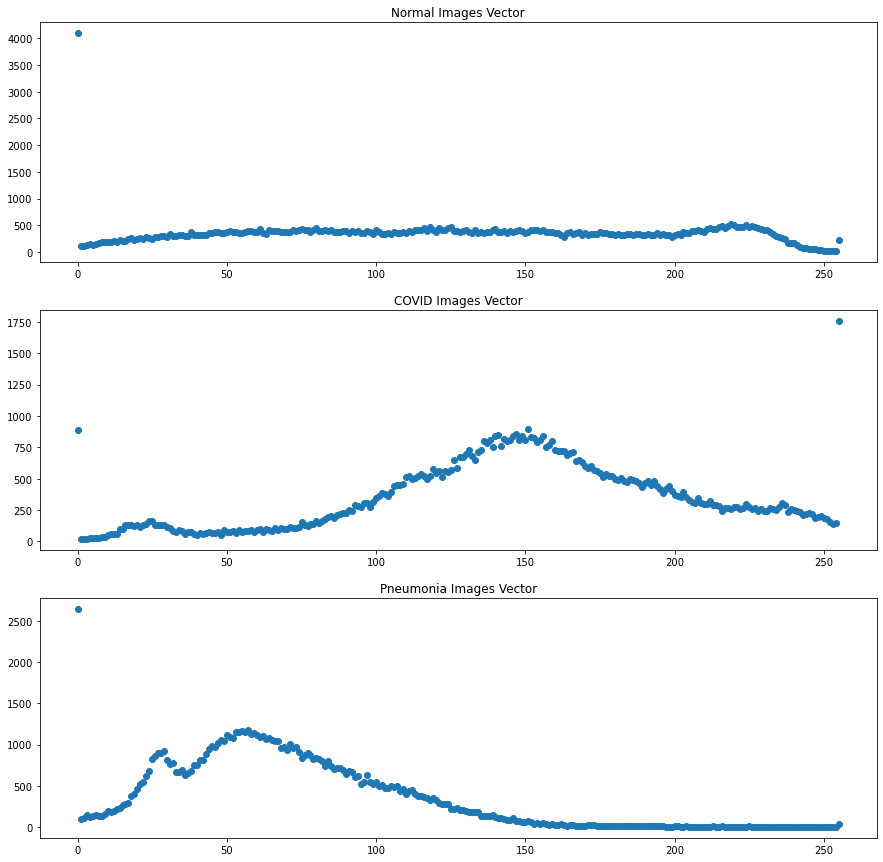

In [11]:

#! display scatter plot a vector in each class
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
axs[0].scatter(range(256), normal_images_vector[11])
axs[0].set_title('Normal Images Vector')
axs[1].scatter(range(256), covid_images_vector[11])
axs[1].set_title('COVID Images Vector')
axs[2].scatter(range(256), pneumonia_images_vector[11])
axs[2].set_title('Pneumonia Images Vector')
plt.show()

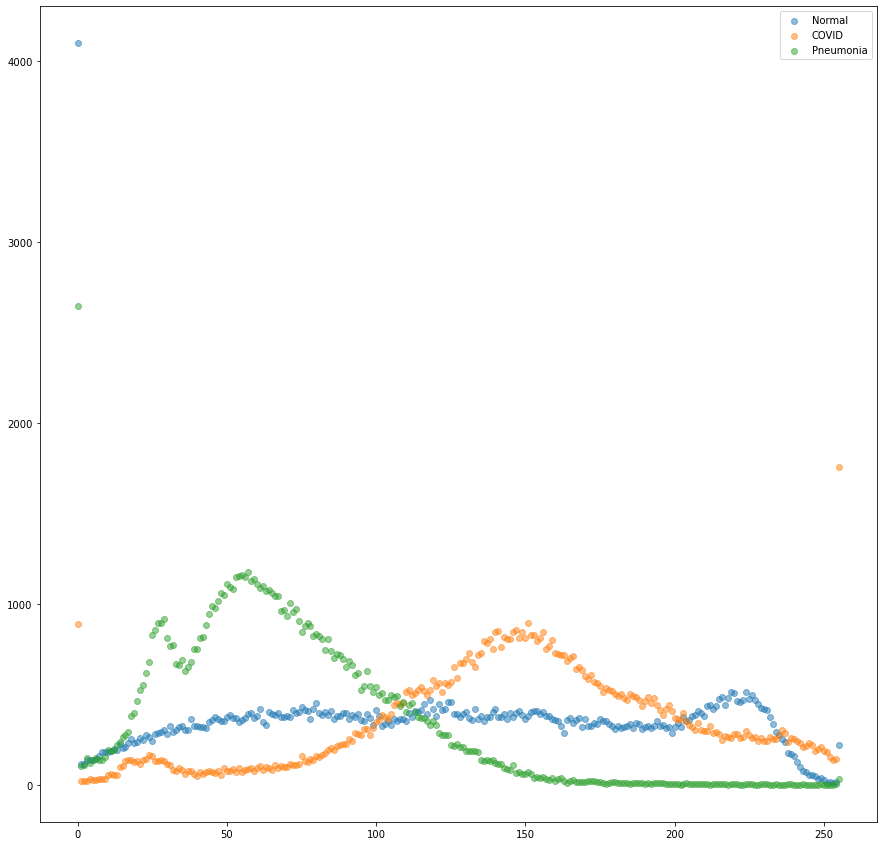

In [12]:
# disply the scatter plot of all classes in same graph
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
axs.scatter(range(256), normal_images_vector[11], alpha=0.5, label='Normal')
axs.scatter(range(256), covid_images_vector[11], alpha=0.5, label='COVID')
axs.scatter(range(256), pneumonia_images_vector[11], alpha=0.5, label='Pneumonia')
axs.legend(loc='upper right')
plt.show()


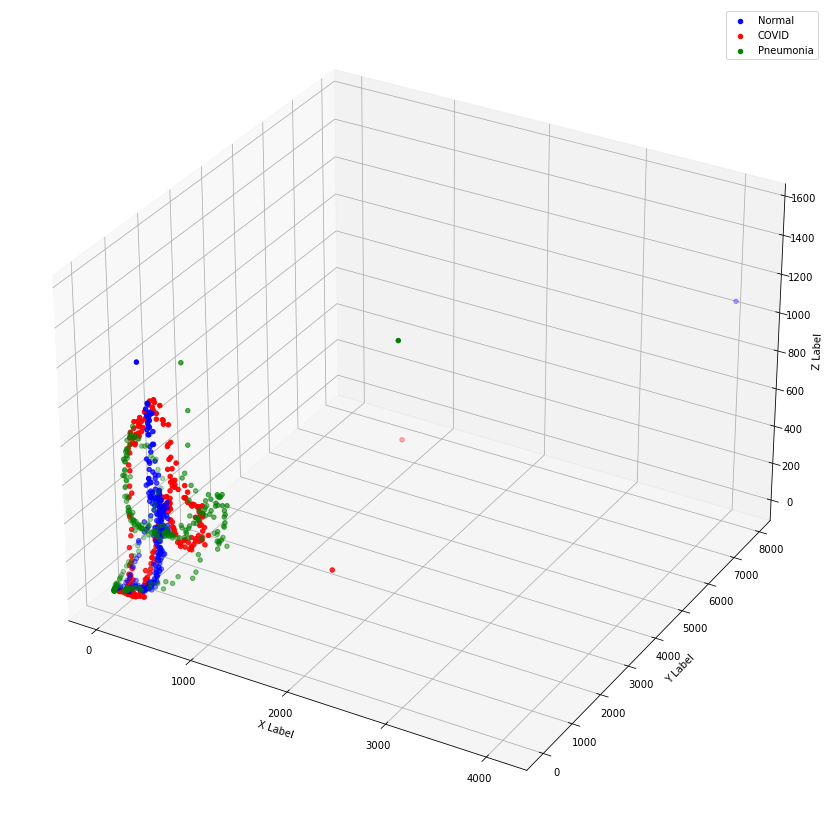

In [37]:
# display the vectors in 3D dimensional space
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(normal_images_vector[11], normal_images_vector[12], normal_images_vector[13], c='b', marker='o', label='Normal')
ax.scatter(covid_images_vector[11], covid_images_vector[12], covid_images_vector[13], c='r', marker='o', label='COVID')
ax.scatter(pneumonia_images_vector[11], pneumonia_images_vector[12], pneumonia_images_vector[13], c='g', marker='o', label='Pneumonia')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='upper right')
plt.show()


## Make clusters for each classes

    - cluster the vectors that are within the initial threshold distance 10000
    - r = 10000


In [13]:
normal_clusters = []
pneumonia_clusters = []
covid_clusters  = []

r = 10000

` Initial Covid Clustering `

In [14]:

#! covid clusters
cluster = []
check = []
for i in range(0, len(covid_images_vector)-1):
    cluster = []
    if covid_images_vector[i] not in check:
        cluster.append(covid_images_vector[i])
        check.append(covid_images_vector[i])
    else:
        continue
    for j in range(i+1, len(covid_images_vector)):

        if euclidean_distance(covid_images_vector[i], covid_images_vector[j]) <= r:
            if covid_images_vector[j] not in check:
                cluster.append(covid_images_vector[j])
                check.append(covid_images_vector[j])

    covid_clusters.append(cluster)

In [15]:
# print the clusters
sum=0
for i in range(0, len(covid_clusters)):
    print("Covid Cluster -", i+1, " : ", len(covid_clusters[i]))
    sum+=len(covid_clusters[i])
print("Total number of vectors: ", sum)

Covid Cluster - 1  :  3214
Covid Cluster - 2  :  182
Covid Cluster - 3  :  2
Covid Cluster - 4  :  40
Covid Cluster - 5  :  31
Covid Cluster - 6  :  8
Covid Cluster - 7  :  23
Covid Cluster - 8  :  28
Covid Cluster - 9  :  1
Covid Cluster - 10  :  5
Covid Cluster - 11  :  3
Covid Cluster - 12  :  3
Covid Cluster - 13  :  1
Covid Cluster - 14  :  6
Covid Cluster - 15  :  1
Covid Cluster - 16  :  1
Covid Cluster - 17  :  6
Covid Cluster - 18  :  1
Covid Cluster - 19  :  1
Covid Cluster - 20  :  2
Covid Cluster - 21  :  1
Covid Cluster - 22  :  1
Covid Cluster - 23  :  1
Covid Cluster - 24  :  1
Covid Cluster - 25  :  1
Covid Cluster - 26  :  1
Total number of vectors:  3565


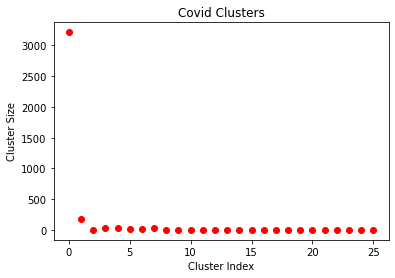

In [30]:
# plot graph to show cluster index vs cluster size of covid clusters

for i in range(0, len(covid_clusters)):
    plt.scatter(i, len(covid_clusters[i]), color='red') 

plt.title('Covid Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()

` Initial Normal Clustering `

In [16]:

#! normal clusters
cluster = []
check = []
for i in range(0, len(normal_images_vector)-1):
    cluster = []
    if normal_images_vector[i] not in check:
        cluster.append(normal_images_vector[i])
        check.append(normal_images_vector[i])
    else:
        continue
    for j in range(i+1, len(normal_images_vector)):

        if euclidean_distance(normal_images_vector[i], normal_images_vector[j]) <= r:
            if normal_images_vector[j] not in check:
                cluster.append(normal_images_vector[j])
                check.append(normal_images_vector[j])

    normal_clusters.append(cluster)

In [17]:

# print the clusters
sum=0
for i in range(0, len(normal_clusters)):
    print("Normal Cluster -", i+1, " : ", len(normal_clusters[i]))
    sum+=len(normal_clusters[i])
print("Total number of vectors: ", sum)

Normal Cluster - 1  :  92
Normal Cluster - 2  :  9028
Normal Cluster - 3  :  861
Normal Cluster - 4  :  1
Normal Cluster - 5  :  8
Normal Cluster - 6  :  59
Normal Cluster - 7  :  21
Normal Cluster - 8  :  1
Normal Cluster - 9  :  5
Normal Cluster - 10  :  14
Normal Cluster - 11  :  14
Normal Cluster - 12  :  10
Normal Cluster - 13  :  7
Normal Cluster - 14  :  8
Normal Cluster - 15  :  7
Normal Cluster - 16  :  5
Normal Cluster - 17  :  6
Normal Cluster - 18  :  1
Normal Cluster - 19  :  2
Normal Cluster - 20  :  1
Normal Cluster - 21  :  9
Normal Cluster - 22  :  3
Normal Cluster - 23  :  3
Normal Cluster - 24  :  2
Normal Cluster - 25  :  1
Normal Cluster - 26  :  6
Normal Cluster - 27  :  3
Normal Cluster - 28  :  2
Normal Cluster - 29  :  1
Normal Cluster - 30  :  3
Normal Cluster - 31  :  1
Normal Cluster - 32  :  2
Normal Cluster - 33  :  1
Normal Cluster - 34  :  1
Normal Cluster - 35  :  1
Normal Cluster - 36  :  1
Total number of vectors:  10191


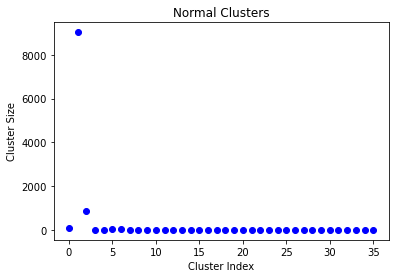

In [31]:
#  plot graph to show cluster index vs cluster size of normal clusters

for i in range(0, len(normal_clusters)):
    plt.scatter(i, len(normal_clusters[i]), color='blue')

plt.title('Normal Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()



` Initial Pneumonia Clustering `

In [18]:

#! pneumonia clusters
cluster = []
check = []
for i in range(0, len(pneumonia_images_vector)-1):
    cluster = []
    if pneumonia_images_vector[i] not in check:
        cluster.append(pneumonia_images_vector[i])
        check.append(pneumonia_images_vector[i])
    else:
        continue
    for j in range(i+1, len(pneumonia_images_vector)):

        if euclidean_distance(pneumonia_images_vector[i], pneumonia_images_vector[j]) <= r:
            if pneumonia_images_vector[j] not in check:
                cluster.append(pneumonia_images_vector[j])
                check.append(pneumonia_images_vector[j])

    pneumonia_clusters.append(cluster)

In [19]:

# print the clusters
sum=0
for i in range(0, len(pneumonia_clusters)):
    print("Pneumonia Cluster -", i+1, " : ", len(pneumonia_clusters[i]))
    sum+=len(pneumonia_clusters[i])
print("Total number of vectors: ", sum)

Pneumonia Cluster - 1  :  1283
Pneumonia Cluster - 2  :  51
Pneumonia Cluster - 3  :  2
Pneumonia Cluster - 4  :  2
Total number of vectors:  1338


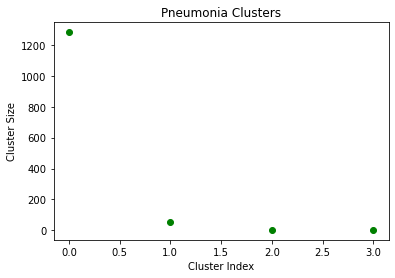

In [32]:
#  plot graph to show cluster index vs cluster size of pneumonia clusters

for i in range(0, len(pneumonia_clusters)):
    plt.scatter(i, len(pneumonia_clusters[i]), color='green')

plt.title('Pneumonia Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()


### Remove outliers from clusters

    - the clusters having less than 10 vectors can be removed as they are outliers

` Remove Outliers from Normal Clusters `

In [20]:
normal_outliers = []
cleaned_normal_clusters = []
for i in normal_clusters:
    if len(i) < 10:
        normal_outliers.extend(i)
    else:
        cleaned_normal_clusters.append(i)

In [21]:
# print the outliers
print("Outliers: ", len(normal_outliers))

# print the clusters
sum=0
for i in range(0, len(cleaned_normal_clusters)):
    print("Cluster ", i+1, " : ", len(cleaned_normal_clusters[i]))
    sum+=len(cleaned_normal_clusters[i])
print("Total number of vectors: ", sum)

Outliers:  92
Cluster  1  :  92
Cluster  2  :  9028
Cluster  3  :  861
Cluster  4  :  59
Cluster  5  :  21
Cluster  6  :  14
Cluster  7  :  14
Cluster  8  :  10
Total number of vectors:  10099


` Remove Outliers from Pneumonia Clusters `

In [22]:

pneumonia_outliers = []
cleaned_pneumonia_clusters = []
for i in pneumonia_clusters:
    if len(i) < 10:
        pneumonia_outliers.extend(i)
    else:
        cleaned_pneumonia_clusters.append(i)

In [23]:

# print the outliers
print("Outliers: ", len(pneumonia_outliers))

# print the clusters
sum=0
for i in range(0, len(cleaned_pneumonia_clusters)):
    print("Cluster ", i+1, " : ", len(cleaned_pneumonia_clusters[i]))
    sum+=len(cleaned_pneumonia_clusters[i])
print("Total number of vectors: ", sum)

Outliers:  4
Cluster  1  :  1283
Cluster  2  :  51
Total number of vectors:  1334


` Remove Outliers from Covid Clusters ` ` 

In [24]:

covid_outliers = []
cleaned_covid_clusters = []
for i in covid_clusters:
    if len(i) < 10:
        covid_outliers.extend(i)
    else:
        cleaned_covid_clusters.append(i)

In [25]:

# print the outliers
print("Outliers: ", len(covid_outliers))

# print the clusters
sum=0
for i in range(0, len(cleaned_covid_clusters)):
    print("Cluster ", i+1, " : ", len(cleaned_covid_clusters[i]))
    sum+=len(cleaned_covid_clusters[i])
print("Total number of vectors: ", sum)



Outliers:  47
Cluster  1  :  3214
Cluster  2  :  182
Cluster  3  :  40
Cluster  4  :  31
Cluster  5  :  23
Cluster  6  :  28
Total number of vectors:  3518


    - We get the clusters after removing outliers
    - convert the clusters back into 1-D array for re-clustering

In [26]:
# covert the cleaned_normal_clusters to one dimensional list
updated_normal_vectors = [item for sublist in cleaned_normal_clusters for item in sublist]

# print the updated_normal_vectors
print("Updated normal vectors: ", len(updated_normal_vectors))

Updated normal vectors:  10099


In [27]:
# convert the cleaned_pneumonia_clusters to one dimensional list
updated_pneumonia_vectors = [item for sublist in cleaned_pneumonia_clusters for item in sublist]

# print the updated_pneumonia_vectors
print("Updated pneumonia vectors: ", len(updated_pneumonia_vectors))


Updated pneumonia vectors:  1334


In [28]:
# convert the cleaned_covid_clusters to one dimensional list
updated_covid_vectors = [item for sublist in cleaned_covid_clusters for item in sublist]

# print the updated_covid_vectors
print("Updated covid vectors: ", len(updated_covid_vectors))


Updated covid vectors:  3518


### Reclustering

    - Recluster the vectors that are within the threshold distance r which can be vary according to number of vectors

` Reclustering normal vectors `

In [40]:
r = 1200

updated_normal_clusters = []  # list of clusters

updated_cluster=[]
check = []
for i in range(0, len(updated_normal_vectors)-1):
    updated_cluster = []
    if updated_normal_vectors[i] not in check:
        updated_cluster.append(updated_normal_vectors[i])
        check.append(updated_normal_vectors[i])
    else:
        continue
    for j in range(i+1, len(updated_normal_vectors)):

        if euclidean_distance(updated_normal_vectors[i], updated_normal_vectors[j]) <= r:
            if updated_normal_vectors[j] not in check:
                updated_cluster.append(updated_normal_vectors[j])
                check.append(updated_normal_vectors[j])

    updated_normal_clusters.append(updated_cluster)

In [41]:
# print the clusters
sum=0
for i in range(0, len(updated_normal_clusters)):
    print("Cluster ", i+1, " : ", len(updated_normal_clusters[i]))
    sum+=len(updated_normal_clusters[i])
print("Total number of vectors: ", sum)

Cluster  1  :  1
Cluster  2  :  1
Cluster  3  :  4
Cluster  4  :  1
Cluster  5  :  1
Cluster  6  :  4
Cluster  7  :  3
Cluster  8  :  1
Cluster  9  :  1
Cluster  10  :  2
Cluster  11  :  4
Cluster  12  :  1
Cluster  13  :  1
Cluster  14  :  1
Cluster  15  :  5
Cluster  16  :  2
Cluster  17  :  1
Cluster  18  :  1
Cluster  19  :  1
Cluster  20  :  1
Cluster  21  :  1
Cluster  22  :  1
Cluster  23  :  1
Cluster  24  :  1
Cluster  25  :  1
Cluster  26  :  1
Cluster  27  :  1
Cluster  28  :  1
Cluster  29  :  2
Cluster  30  :  1
Cluster  31  :  1
Cluster  32  :  1
Cluster  33  :  1
Cluster  34  :  1
Cluster  35  :  1
Cluster  36  :  1
Cluster  37  :  1
Cluster  38  :  1
Cluster  39  :  2
Cluster  40  :  1
Cluster  41  :  1
Cluster  42  :  1
Cluster  43  :  1
Cluster  44  :  1
Cluster  45  :  1
Cluster  46  :  1
Cluster  47  :  1
Cluster  48  :  1
Cluster  49  :  1
Cluster  50  :  1
Cluster  51  :  1
Cluster  52  :  1
Cluster  53  :  1
Cluster  54  :  1
Cluster  55  :  1
Cluster  56  :  1
C

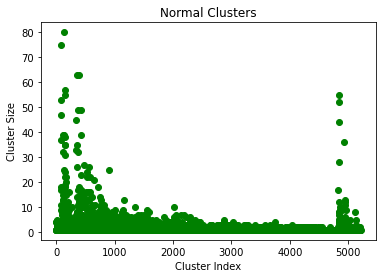

In [47]:
#  plot graph to show cluster index vs cluster size of normal clusters

for i in range(0, len(updated_normal_clusters)):
    plt.scatter(i, len(updated_normal_clusters[i]), color='green')

plt.title('Normal Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()

` Reclustering covid vectors `

In [42]:
r = 1000

updated_covid_clusters = []  # list of clusters

updated_cluster=[]
check = []
for i in range(0, len(updated_covid_vectors)-1):
    updated_cluster = []
    if updated_covid_vectors[i] not in check:
        updated_cluster.append(updated_covid_vectors[i])
        check.append(updated_covid_vectors[i])
    else:
        continue
    for j in range(i+1, len(updated_covid_vectors)):

        if euclidean_distance(updated_covid_vectors[i], updated_covid_vectors[j]) <= r:
            if updated_covid_vectors[j] not in check:
                updated_cluster.append(updated_covid_vectors[j])
                check.append(updated_covid_vectors[j])

    updated_covid_clusters.append(updated_cluster)

In [43]:
# print the clusters
sum=0
for i in range(0, len(updated_covid_clusters)):
    print("Cluster ", i+1, " : ", len(updated_covid_clusters[i]))
    sum+=len(updated_covid_clusters[i])
print("Total number of vectors: ", sum)

Cluster  1  :  2
Cluster  2  :  2
Cluster  3  :  1
Cluster  4  :  1
Cluster  5  :  1
Cluster  6  :  1
Cluster  7  :  1
Cluster  8  :  2
Cluster  9  :  1
Cluster  10  :  1
Cluster  11  :  2
Cluster  12  :  8
Cluster  13  :  1
Cluster  14  :  1
Cluster  15  :  3
Cluster  16  :  1
Cluster  17  :  1
Cluster  18  :  1
Cluster  19  :  1
Cluster  20  :  3
Cluster  21  :  1
Cluster  22  :  1
Cluster  23  :  1
Cluster  24  :  1
Cluster  25  :  1
Cluster  26  :  1
Cluster  27  :  1
Cluster  28  :  2
Cluster  29  :  1
Cluster  30  :  2
Cluster  31  :  1
Cluster  32  :  1
Cluster  33  :  1
Cluster  34  :  1
Cluster  35  :  1
Cluster  36  :  1
Cluster  37  :  2
Cluster  38  :  1
Cluster  39  :  1
Cluster  40  :  5
Cluster  41  :  1
Cluster  42  :  3
Cluster  43  :  3
Cluster  44  :  2
Cluster  45  :  2
Cluster  46  :  1
Cluster  47  :  9
Cluster  48  :  1
Cluster  49  :  1
Cluster  50  :  4
Cluster  51  :  3
Cluster  52  :  1
Cluster  53  :  2
Cluster  54  :  2
Cluster  55  :  1
Cluster  56  :  1
C

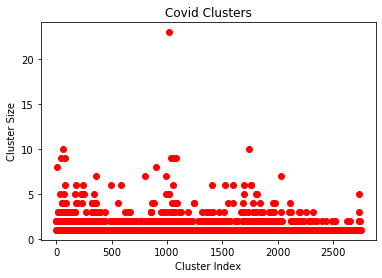

In [48]:
# plot graph to show cluster index vs cluster size of covid clusters

for i in range(0, len(updated_covid_clusters)):
    plt.scatter(i, len(updated_covid_clusters[i]), color='red')

plt.title('Covid Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()


` Reclustering pneumonia vectors `

In [44]:
r = 1600

updated_pneumonia_clusters = []  # list of clusters

updated_cluster=[]
check = []
for i in range(0, len(updated_pneumonia_vectors)-1):
    updated_cluster = []
    if updated_pneumonia_vectors[i] not in check:
        updated_cluster.append(updated_pneumonia_vectors[i])
        check.append(updated_pneumonia_vectors[i])
    else:
        continue
    for j in range(i+1, len(updated_pneumonia_vectors)):

        if euclidean_distance(updated_pneumonia_vectors[i], updated_pneumonia_vectors[j]) <= r:
            if updated_pneumonia_vectors[j] not in check:
                updated_cluster.append(updated_pneumonia_vectors[j])
                check.append(updated_pneumonia_vectors[j])

    updated_pneumonia_clusters.append(updated_cluster)

In [45]:
# print the clusters
sum=0
for i in range(0, len(updated_pneumonia_clusters)):
    print("Cluster ", i+1, " : ", len(updated_pneumonia_clusters[i]))
    sum+=len(updated_pneumonia_clusters[i])
print("Total number of vectors: ", sum)

Cluster  1  :  22
Cluster  2  :  26
Cluster  3  :  41
Cluster  4  :  26
Cluster  5  :  25
Cluster  6  :  5
Cluster  7  :  13
Cluster  8  :  11
Cluster  9  :  16
Cluster  10  :  3
Cluster  11  :  1
Cluster  12  :  2
Cluster  13  :  3
Cluster  14  :  5
Cluster  15  :  3
Cluster  16  :  4
Cluster  17  :  6
Cluster  18  :  28
Cluster  19  :  13
Cluster  20  :  1
Cluster  21  :  1
Cluster  22  :  1
Cluster  23  :  13
Cluster  24  :  5
Cluster  25  :  7
Cluster  26  :  4
Cluster  27  :  1
Cluster  28  :  6
Cluster  29  :  1
Cluster  30  :  5
Cluster  31  :  2
Cluster  32  :  4
Cluster  33  :  1
Cluster  34  :  1
Cluster  35  :  1
Cluster  36  :  7
Cluster  37  :  1
Cluster  38  :  1
Cluster  39  :  1
Cluster  40  :  1
Cluster  41  :  1
Cluster  42  :  4
Cluster  43  :  8
Cluster  44  :  7
Cluster  45  :  1
Cluster  46  :  24
Cluster  47  :  19
Cluster  48  :  13
Cluster  49  :  8
Cluster  50  :  1
Cluster  51  :  1
Cluster  52  :  1
Cluster  53  :  2
Cluster  54  :  1
Cluster  55  :  1
Clust

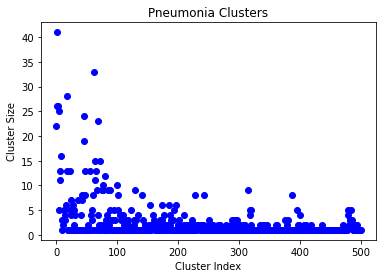

In [49]:
# plot graph to show cluster index vs cluster size of pneumonia clusters

for i in range(0, len(updated_pneumonia_clusters)):
    plt.scatter(i, len(updated_pneumonia_clusters[i]), color='blue')

plt.title('Pneumonia Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.show()

### Averaging the clusters

    - Average the vectors in each sub-cluster to get the prototype vector for each cluster
    - Each average vector will represent the prototype vector for each class

` Normal Prototype Vectors `

In [50]:
# get the average of each sub-cluster in updated_normal_clusters
normal_prototypes = []
for i in range(0, len(updated_normal_clusters)):
    normal_prototypes.append(np.mean(updated_normal_clusters[i], axis=0))

# print the normal_prototypes
print("No. of Normal prototypes: ", len(normal_prototypes))

No. of Normal prototypes:  5210


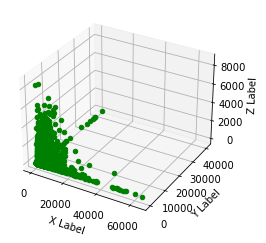

In [59]:
# plot the projection of normal_prototypes in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, len(normal_prototypes)):
    ax.scatter(normal_prototypes[i][0], normal_prototypes[i][1], normal_prototypes[i][2], color='green')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

` Covid Prototype Vectors `

In [51]:
# get the average of each sub-cluster in updated_covid_clusters
covid_prototypes = []
for i in range(0, len(updated_covid_clusters)):
    covid_prototypes.append(np.mean(updated_covid_clusters[i], axis=0))

# print the covid_prototypes
print("No. of Covid prototypes: ", len(covid_prototypes))


No. of Covid prototypes:  2746


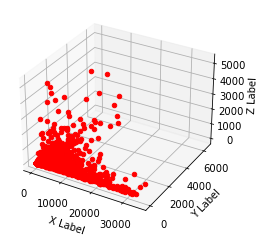

In [60]:
# plot the projection of covid_prototypes in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, len(covid_prototypes)):
    ax.scatter(covid_prototypes[i][0], covid_prototypes[i][1], covid_prototypes[i][2], color='red') 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

` Pneumonia Prototype Vectors `

In [52]:
# get the average of each sub-cluster in updated_pneumonia_clusters
pneumonia_prototypes = []
for i in range(0, len(updated_pneumonia_clusters)):
    pneumonia_prototypes.append(np.mean(updated_pneumonia_clusters[i], axis=0))

# print the pneumonia_prototypes
print("No. of Pneumonia prototypes: ", len(pneumonia_prototypes))

No. of Pneumonia prototypes:  500


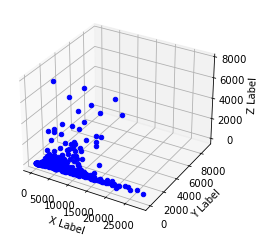

In [61]:
# plot the projection of pneumonia_prototypes in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, len(pneumonia_prototypes)):
    ax.scatter(pneumonia_prototypes[i][0], pneumonia_prototypes[i][1], pneumonia_prototypes[i][2], color='blue')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

` All Prototype Vectors in 1 graph `

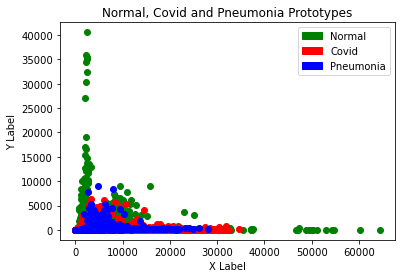

In [69]:
# plot the projection of normal_prototypes, covid_prototypes and pneumonia_prototypes in 2D space

for i in range(0, len(normal_prototypes)):
    plt.scatter(normal_prototypes[i][0], normal_prototypes[i][1], color='green')

for i in range(0, len(covid_prototypes)):
    plt.scatter(covid_prototypes[i][0], covid_prototypes[i][1], color='red')

for i in range(0, len(pneumonia_prototypes)):
    plt.scatter(pneumonia_prototypes[i][0], pneumonia_prototypes[i][1], color='blue')

plt.title('Normal, Covid and Pneumonia Prototypes')
plt.xlabel('X Label')
plt.ylabel('Y Label')
# show legend for the plot with labels and colors   
green_patch = mpatches.Patch(color='green', label='Normal')
red_patch = mpatches.Patch(color='red', label='Covid')
blue_patch = mpatches.Patch(color='blue', label='Pneumonia')
plt.legend(handles=[green_patch, red_patch, blue_patch])


plt.show()

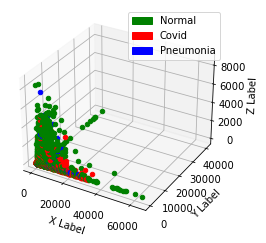

In [67]:
# plot the projection of normal_prototypes, covid_prototypes and pneumonia_prototypes in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, len(normal_prototypes)):
    ax.scatter(normal_prototypes[i][0], normal_prototypes[i][1], normal_prototypes[i][2], color='green')

for i in range(0, len(covid_prototypes)):
    ax.scatter(covid_prototypes[i][0], covid_prototypes[i][1], covid_prototypes[i][2], color='red')

for i in range(0, len(pneumonia_prototypes)):
    ax.scatter(pneumonia_prototypes[i][0], pneumonia_prototypes[i][1], pneumonia_prototypes[i][2], color='blue')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# show legend for the plot with labels and colors   
green_patch = mpatches.Patch(color='green', label='Normal')
red_patch = mpatches.Patch(color='red', label='Covid')
blue_patch = mpatches.Patch(color='blue', label='Pneumonia')
plt.legend(handles=[green_patch, red_patch, blue_patch])

plt.show()

### Load the Test Images
    
    ` Normal Lungs Test Images `
    
    ` Pneumonia Lungs Test Images `
    
    ` COVID Lungs Test Images


In [90]:
covid_test_images_length = len(os.listdir(
    './COVID-19_Radiography_Dataset/COVID/test_images_sharpen/'))
normal_test_images_length = len(os.listdir(
    './COVID-19_Radiography_Dataset/Normal/test_images_sharpen/'))
pneumonia_test_images_length = len(os.listdir(
    './COVID-19_Radiography_Dataset/Viral Pneumonia/test_images_sharpen/'))

print("No. of Covid test images: ", covid_test_images_length)

print("No. of Normal test images: ", normal_test_images_length)

print("No. of Pneumonia test images: ", pneumonia_test_images_length)
# get the test images
covid_test_images = []
normal_test_images = []
pneumonia_test_images = []

for i in range(1, normal_images_length+1):
    normal_test_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/Normal/test_images_sharpen/Normal-'+str(i)+'.png'))

for i in range(1, covid_test_images_length+1):
    covid_test_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/COVID/test_images_sharpen/COVID-'+str(i)+'.png'))

for i in range(1, pneumonia_test_images_length+1):
    pneumonia_test_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/Viral Pneumonia/test_images_sharpen/Viral Pneumonia-'+str(i)+'.png'))


No. of Covid test images:  205
No. of Normal test images:  205
No. of Pneumonia test images:  205


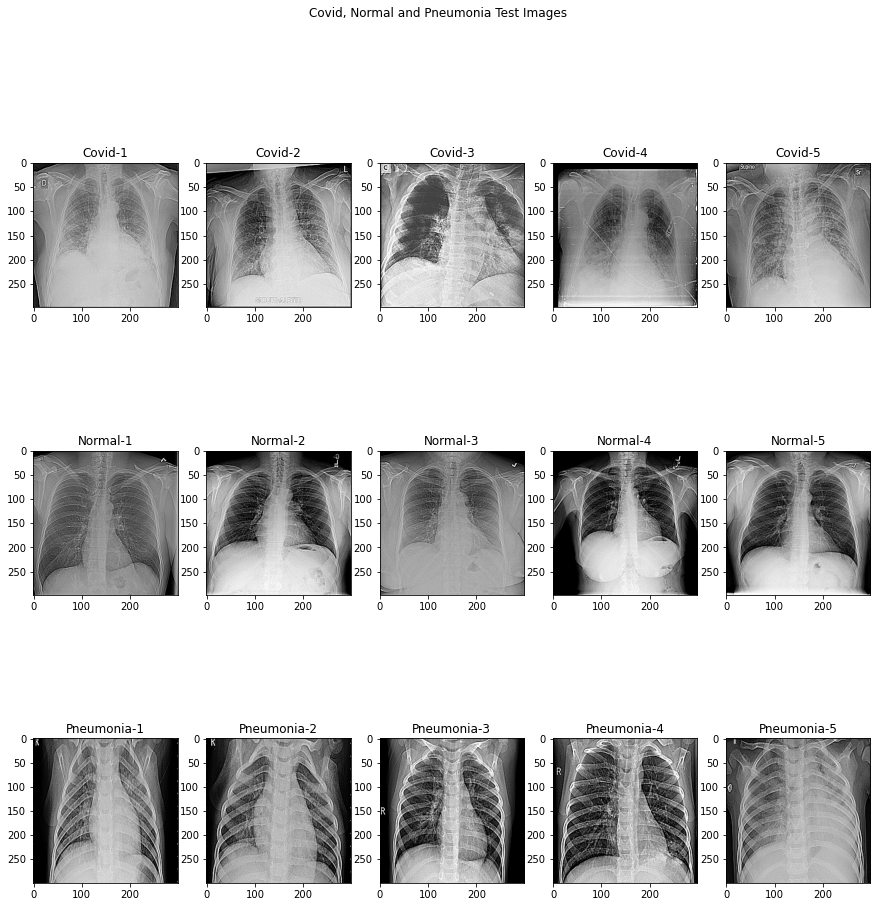

In [103]:

#! Display image no. 10 to image no. 15 from each class with labels with numbers in same plot
fig, axs = plt.subplots(3, 5, figsize=(15, 15))
fig.suptitle('Covid, Normal and Pneumonia Test Images')

for i in range(0, 5):
    axs[0, i].imshow(covid_test_images[i+5])
    axs[0, i].set_title('Covid-'+str(i+1))
    axs[1, i].imshow(normal_test_images[i+5])
    axs[1, i].set_title('Normal-'+str(i+1))
    axs[2, i].imshow(pneumonia_test_images[i+5])
    axs[2, i].set_title('Pneumonia-'+str(i+1))

plt.show()


### Load the Test Vectors

    ` Normal Lungs Test Vector `
    
    ` Pneumonia Lungs Test Vector `
    
    ` COVID Lungs Test Vector `

In [92]:
# get the test vectors
covid_test_vectors = loadFile('./COVID-19_Radiography_Dataset/COVID/covid_test_vector.txt')
normal_test_vectors = loadFile('./COVID-19_Radiography_Dataset/Normal/normal_test_vector.txt')
pneumonia_test_vectors = loadFile('./COVID-19_Radiography_Dataset/Viral Pneumonia/pneumonia_test_vector.txt')

# print test vectors
print("No. of Covid test vectors: ", len(covid_test_vectors))
print("No. of Normal test vectors: ", len(normal_test_vectors))
print("No. of Pneumonia test vectors: ", len(pneumonia_test_vectors))


No. of Covid test vectors:  205
No. of Normal test vectors:  205
No. of Pneumonia test vectors:  205


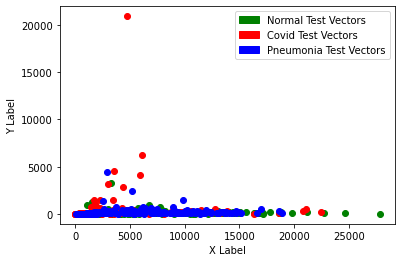

In [95]:
# plot the projection of normal_test_vectors, covid_test_vectors and pneumonia_test_vectors in 2D space

for i in range(0, len(normal_test_vectors)):
    plt.scatter(normal_test_vectors[i][0], normal_test_vectors[i][1], color='green')

for i in range(0, len(covid_test_vectors)):
    plt.scatter(covid_test_vectors[i][0], covid_test_vectors[i][1], color='red')

for i in range(0, len(pneumonia_test_vectors)):
    plt.scatter(pneumonia_test_vectors[i][0], pneumonia_test_vectors[i][1], color='blue')

plt.xlabel('X Label')
plt.ylabel('Y Label')

# show legend for the plot with labels and colors
green_patch = mpatches.Patch(color='green', label='Normal Test Vectors')
red_patch = mpatches.Patch(color='red', label='Covid Test Vectors')
blue_patch = mpatches.Patch(color='blue', label='Pneumonia Test Vectors')
plt.legend(handles=[green_patch, red_patch, blue_patch])

plt.show()

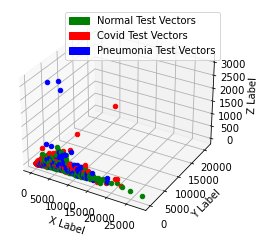

In [96]:
# plot the projection of normal_test_vectors, covid_test_vectors and pneumonia_test_vectors in 3D space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, len(normal_test_vectors)):
    ax.scatter(normal_test_vectors[i][0], normal_test_vectors[i][1], normal_test_vectors[i][2], color='green')

for i in range(0, len(covid_test_vectors)):
    ax.scatter(covid_test_vectors[i][0], covid_test_vectors[i][1], covid_test_vectors[i][2], color='red')

for i in range(0, len(pneumonia_test_vectors)):
    ax.scatter(pneumonia_test_vectors[i][0], pneumonia_test_vectors[i][1], pneumonia_test_vectors[i][2], color='blue')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# show legend for the plot with labels and colors
green_patch = mpatches.Patch(color='green', label='Normal Test Vectors')
red_patch = mpatches.Patch(color='red', label='Covid Test Vectors')
blue_patch = mpatches.Patch(color='blue', label='Pneumonia Test Vectors')
plt.legend(handles=[green_patch, red_patch, blue_patch])

plt.show()

### Get Distance of Test Vectors from Prototype Vectors


1. For Covid Test Image

` Considering the first test vector from covid_test_vector`

    - Get the distance of the test vector from each prototype vector of each class
    - Get the minimum distance and the index of the prototype vector from which the minimum distance is obtained of each class

In [110]:
test_vector = covid_test_vectors[0]
test_image = covid_test_images[0]

covid_prototype_index, covid_prototype_distance = getPrototype(test_vector, covid_prototypes)
normal_prototype_index, normal_prototype_distance = getPrototype(test_vector, normal_prototypes)
pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(test_vector, pneumonia_prototypes)

print("\n Class Covid =>","\tPrototype Index: ", covid_prototype_index, "\tPrototype Distance: ", covid_prototype_distance)

print("\n Class Normal =>","\tPrototype Index: ", normal_prototype_index, "\tPrototype Distance: ", normal_prototype_distance)

print("\n Class Pneumonia =>","\tPrototype Index: ", pneumonia_prototype_index, "\tPrototype Distance: ", pneumonia_prototype_distance)


 Class Covid => 	Prototype Index:  0 	Prototype Distance:  423.8802897045344

 Class Normal => 	Prototype Index:  3497 	Prototype Distance:  2433.0774751330873

 Class Pneumonia => 	Prototype Index:  157 	Prototype Distance:  2627.2531282691434


` Compare the minimum distance of each class and get the membership value of the test vector for each class`

In [118]:
# get membership values for each class
covid_membership = getDegreeOfMembership("covid",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
normal_membership = getDegreeOfMembership("normal",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
pneumonia_membership = getDegreeOfMembership("pneumonia",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)

print("\n Class Covid =>","\tDegree of Membership: ", covid_membership)

print("\n Class Normal =>","\tDegree of Membership: ", normal_membership)

print("\n Class Pneumonia =>","\tDegree of Membership: ", pneumonia_membership)

print("\n\n The  %  of input image being Covid is: ", covid_membership*100,"%")

print("\n The  %  of input image being Normal is: ", normal_membership*100,"%")

print("\n The  %  of input image being Pneumonia is: ", pneumonia_membership*100,"%")



 Class Covid => 	Degree of Membership:  0.9227089734573629

 Class Normal => 	Degree of Membership:  0.5563486666438593

 Class Pneumonia => 	Degree of Membership:  0.5209423598987777


 The  %  of input image being Covid is:  92.27089734573629 %

 The  %  of input image being Normal is:  55.63486666438593 %

 The  %  of input image being Pneumonia is:  52.09423598987777 %


### Assign Class
    - Assign the class with maximum membership value




 The assigned class is:  covid


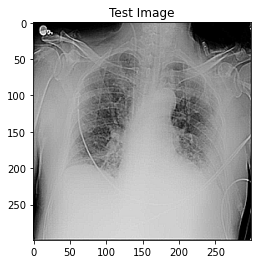

In [125]:
# assign class

assigned_class = assignClass(covid_membership, normal_membership, pneumonia_membership)

print("\n\n The assigned class is: ", assigned_class)

# plot the test image
plt.imshow(test_image)
plt.title('Test Image')
plt.show()

2. For Normal Test Image

` Considering any vector from normal_test_vector`

    - Get the distance of the test vector from each prototype vector of each class
    - Get the minimum distance and the index of the prototype vector from which the minimum distance is obtained of each class

In [127]:
test_vector = normal_test_vectors[5]
test_image = normal_test_images[5]

covid_prototype_index, covid_prototype_distance = getPrototype(test_vector, covid_prototypes)
normal_prototype_index, normal_prototype_distance = getPrototype(test_vector, normal_prototypes)
pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(test_vector, pneumonia_prototypes)

print("\n Class Covid =>","\tPrototype Index: ", covid_prototype_index, "\tPrototype Distance: ", covid_prototype_distance)

print("\n Class Normal =>","\tPrototype Index: ", normal_prototype_index, "\tPrototype Distance: ", normal_prototype_distance)

print("\n Class Pneumonia =>","\tPrototype Index: ", pneumonia_prototype_index, "\tPrototype Distance: ", pneumonia_prototype_distance)


 Class Covid => 	Prototype Index:  165 	Prototype Distance:  1611.5241233068775

 Class Normal => 	Prototype Index:  82 	Prototype Distance:  537.5917834378

 Class Pneumonia => 	Prototype Index:  126 	Prototype Distance:  2132.1904230157306


` Compare the minimum distance of each class and get the membership value of the test vector for each class`

In [128]:
# get membership values for each class
covid_membership = getDegreeOfMembership("covid",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
normal_membership = getDegreeOfMembership("normal",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
pneumonia_membership = getDegreeOfMembership("pneumonia",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)

print("\n Class Covid =>","\tDegree of Membership: ", covid_membership)

print("\n Class Normal =>","\tDegree of Membership: ", normal_membership)

print("\n Class Pneumonia =>","\tDegree of Membership: ", pneumonia_membership)

print("\n\n The  %  of input image being Covid is: ", covid_membership*100,"%")

print("\n The  %  of input image being Normal is: ", normal_membership*100,"%")

print("\n The  %  of input image being Pneumonia is: ", pneumonia_membership*100,"%")



 Class Covid => 	Degree of Membership:  0.6235905587729663

 Class Normal => 	Degree of Membership:  0.8744327684050851

 Class Pneumonia => 	Degree of Membership:  0.5019766728219485


 The  %  of input image being Covid is:  62.35905587729663 %

 The  %  of input image being Normal is:  87.44327684050852 %

 The  %  of input image being Pneumonia is:  50.19766728219485 %


### Assign Class
    - Assign the class with maximum membership value




 The assigned class is:  normal


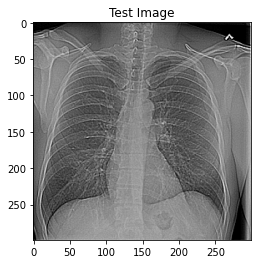

In [129]:
# assign class

assigned_class = assignClass(covid_membership, normal_membership, pneumonia_membership)

print("\n\n The assigned class is: ", assigned_class)

# plot the test image
plt.imshow(test_image)
plt.title('Test Image')
plt.show()

3. For Pneumonia Test Image

` Considering any vector from pneumonia_test_vector`

    - Get the distance of the test vector from each prototype vector of each class
    - Get the minimum distance and the index of the prototype vector from which the minimum distance is obtained of each class

In [130]:
test_vector = pneumonia_test_vectors[5]
test_image = pneumonia_test_images[5]

covid_prototype_index, covid_prototype_distance = getPrototype(test_vector, covid_prototypes)
normal_prototype_index, normal_prototype_distance = getPrototype(test_vector, normal_prototypes)
pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(test_vector, pneumonia_prototypes)

print("\n Class Covid =>","\tPrototype Index: ", covid_prototype_index, "\tPrototype Distance: ", covid_prototype_distance)

print("\n Class Normal =>","\tPrototype Index: ", normal_prototype_index, "\tPrototype Distance: ", normal_prototype_distance)

print("\n Class Pneumonia =>","\tPrototype Index: ", pneumonia_prototype_index, "\tPrototype Distance: ", pneumonia_prototype_distance)


 Class Covid => 	Prototype Index:  1945 	Prototype Distance:  1657.1318595694188

 Class Normal => 	Prototype Index:  4913 	Prototype Distance:  1099.1796941355858

 Class Pneumonia => 	Prototype Index:  4 	Prototype Distance:  738.2252100815848


` Compare the minimum distance of each class and get the membership value of the test vector for each class`

In [131]:
# get membership values for each class
covid_membership = getDegreeOfMembership("covid",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
normal_membership = getDegreeOfMembership("normal",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
pneumonia_membership = getDegreeOfMembership("pneumonia",covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)

print("\n Class Covid =>","\tDegree of Membership: ", covid_membership)

print("\n Class Normal =>","\tDegree of Membership: ", normal_membership)

print("\n Class Pneumonia =>","\tDegree of Membership: ", pneumonia_membership)

print("\n\n The  %  of input image being Covid is: ", covid_membership*100,"%")

print("\n The  %  of input image being Normal is: ", normal_membership*100,"%")

print("\n The  %  of input image being Pneumonia is: ", pneumonia_membership*100,"%")



 Class Covid => 	Degree of Membership:  0.5257935538861541

 Class Normal => 	Degree of Membership:  0.685457681966252

 Class Pneumonia => 	Degree of Membership:  0.7887487641475939


 The  %  of input image being Covid is:  52.57935538861541 %

 The  %  of input image being Normal is:  68.5457681966252 %

 The  %  of input image being Pneumonia is:  78.87487641475938 %


### Assign Class
    - Assign the class with maximum membership value




 The assigned class is:  normal


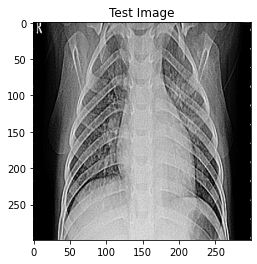

In [132]:
# assign class

assigned_class = assignClass(covid_membership, normal_membership, pneumonia_membership)

print("\n\n The assigned class is: ", assigned_class)

# plot the test image
plt.imshow(test_image)
plt.title('Test Image')
plt.show()

4. For all test images

In [ ]:
covidCorrectlyClassified = 0
normalCorrectlyClassified = 0
pneumoniaCorrectlyClassified = 0

#! for covid test vectors
for i in range(0, len(covid_test_vectors)):
    #!get the distances of each test vector with each prototype of each class
    covid_prototype_index, covid_prototype_distance = getPrototype(
        covid_test_vectors[i], covid_prototypes)
    normal_prototype_index, normal_prototype_distance = getPrototype(
        covid_test_vectors[i], normal_prototypes)
    pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(
        covid_test_vectors[i], pneumonia_prototypes)
    #! get the membership of each test vector for each class
    covid_membership = getDegreeOfMembership(
        "covid", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    normal_membership = getDegreeOfMembership(
        "normal", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    pneumonia_membership = getDegreeOfMembership(
        "pneumonia", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    #! assign class to each test vector
    assigned_class = assignClass(
        covid_membership, normal_membership, pneumonia_membership)
    #! if "covid" is assigned then increment the counter
    if assigned_class == "covid":
        covidCorrectlyClassified = covidCorrectlyClassified + 1

#! for normal test vectors
for i in range(0, len(normal_test_vectors)):
    #!get the distances of each test vector with each prototype of each class
    covid_prototype_index, covid_prototype_distance = getPrototype(
        normal_test_vectors[i], covid_prototypes)
    normal_prototype_index, normal_prototype_distance = getPrototype(
        normal_test_vectors[i], normal_prototypes)
    pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(
        normal_test_vectors[i], pneumonia_prototypes)
    #! get the membership of each test vector for each class
    covid_membership = getDegreeOfMembership(
        "covid", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    normal_membership = getDegreeOfMembership(
        "normal", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    pneumonia_membership = getDegreeOfMembership(
        "pneumonia", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    #! assign class to each test vector
    assigned_class = assignClass(
        covid_membership, normal_membership, pneumonia_membership)
    #! if "covid" is assigned then increment the counter
    if assigned_class == "normal":
        normalCorrectlyClassified = normalCorrectlyClassified + 1

#! for pneumonia test vectors
for i in range(0, len(pneumonia_test_vectors)):
    #!get the distances of each test vector with each prototype of each class
    covid_prototype_index, covid_prototype_distance = getPrototype(
        pneumonia_test_vectors[i], covid_prototypes)
    normal_prototype_index, normal_prototype_distance = getPrototype(
        pneumonia_test_vectors[i], normal_prototypes)
    pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(
        pneumonia_test_vectors[i], pneumonia_prototypes)
    #! get the membership of each test vector for each class
    covid_membership = getDegreeOfMembership(
        "covid", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    normal_membership = getDegreeOfMembership(
        "normal", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    pneumonia_membership = getDegreeOfMembership(
        "pneumonia", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    #! assign class to each test vector
    assigned_class = assignClass(
        covid_membership, normal_membership, pneumonia_membership)
    #! if "covid" is assigned then increment the counter
    if assigned_class == "pneumonia":
        pneumoniaCorrectlyClassified = pneumoniaCorrectlyClassified + 1


In [134]:
totalTestImages = len(pneumonia_test_vectors) + len(covid_test_vectors) + len(normal_test_vectors)
correctlyClassifiedImages = pneumoniaCorrectlyClassified + covidCorrectlyClassified + normalCorrectlyClassified

accuracyOfModel = accuracy(totalTestImages, correctlyClassifiedImages)

print("Covid correctly classified:\t", covidCorrectlyClassified)
print("Normal correctly classified:\t", normalCorrectlyClassified)
print("Pneumonia correctly classified\t: ", pneumoniaCorrectlyClassified)

print("\n\nAccuracy=>\t", accuracyOfModel)

Covid correctly classified:	 204
Normal correctly classified:	 205
Pneumonia correctly classified	:  86


Accuracy=>	 80.48780487804879


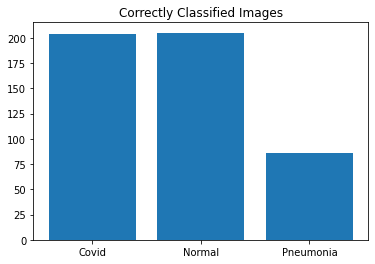

In [136]:
# plot the above results
plt.bar(['Covid', 'Normal', 'Pneumonia'], [covidCorrectlyClassified, normalCorrectlyClassified, pneumoniaCorrectlyClassified])
plt.title('Correctly Classified Images')
plt.show()



### Testing for a random image which may or may not have lungs xray

1. Contains Covid infected lungs

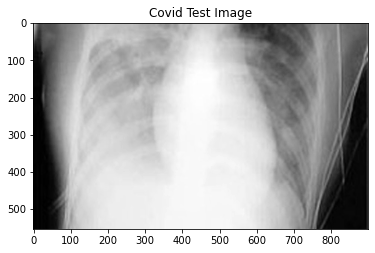


 Class Covid => 	Prototype Index:  614 	Prototype Distance:  33532.34016587569

 Class Normal => 	Prototype Index:  1355 	Prototype Distance:  33579.38937800984

 Class Pneumonia => 	Prototype Index:  452 	Prototype Distance:  34974.19535886423

 Class Covid => 	Membership:  0.6715282719158431

 Class Normal => 	Membership:  0.6710673933747615

 Class Pneumonia => 	Membership:  0.6574043347093956

 Assigned Class => covid


In [155]:
test_image  = cv2.imread('./covid_test.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# plot the test image
plt.imshow(test_image, cmap='gray')
plt.title('Covid Test Image')
plt.show()

if not is_lung_image(test_image):
    print("The image does not contain lungs")
else:
    test_vector = get_img_vector(test_image)

    # get the distances of each test vector with each prototype of each class
    covid_prototype_index, covid_prototype_distance = getPrototype(test_vector, covid_prototypes)
    normal_prototype_index, normal_prototype_distance = getPrototype(test_vector, normal_prototypes)
    pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(test_vector, pneumonia_prototypes)

    print("\n Class Covid =>","\tPrototype Index: ", covid_prototype_index, "\tPrototype Distance: ", covid_prototype_distance)

    print("\n Class Normal =>","\tPrototype Index: ", normal_prototype_index, "\tPrototype Distance: ", normal_prototype_distance)

    print("\n Class Pneumonia =>","\tPrototype Index: ", pneumonia_prototype_index, "\tPrototype Distance: ", pneumonia_prototype_distance)

    # get the membership of each test vector for each class
    covid_membership = getDegreeOfMembership("covid", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    normal_membership = getDegreeOfMembership("normal", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    pneumonia_membership = getDegreeOfMembership("pneumonia", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)

    print("\n Class Covid =>","\tMembership: ", covid_membership)

    print("\n Class Normal =>","\tMembership: ", normal_membership)

    print("\n Class Pneumonia =>","\tMembership: ", pneumonia_membership)

    # assign class to each test vector
    assigned_class = assignClass(covid_membership, normal_membership, pneumonia_membership)

    print("\n Assigned Class =>", assigned_class)




2. Contains normal lungs

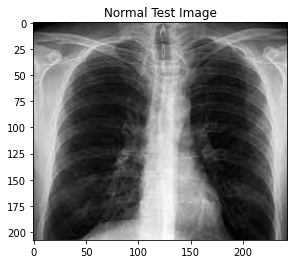


 Class Covid => 	Prototype Index:  869 	Prototype Distance:  3618.2429437504607

 Class Normal => 	Prototype Index:  2560 	Prototype Distance:  3154.2480878967017

 Class Pneumonia => 	Prototype Index:  23 	Prototype Distance:  3902.411444222663

 Class Covid => 	Membership:  0.6610514286262241

 Class Normal => 	Membership:  0.7045173859876708

 Class Pneumonia => 	Membership:  0.6344311853861052

 Assigned Class => normal


In [156]:
test_image  = cv2.imread('./normal_test_2.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# plot the test image 
plt.imshow(test_image, cmap='gray')
plt.title('Normal Test Image')
plt.show()

if not is_lung_image(test_image):
    print("The image does not contain lungs")
else:
    test_vector = get_img_vector(test_image)

    # get the distances of each test vector with each prototype of each class
    covid_prototype_index, covid_prototype_distance = getPrototype(test_vector, covid_prototypes)
    normal_prototype_index, normal_prototype_distance = getPrototype(test_vector, normal_prototypes)
    pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(test_vector, pneumonia_prototypes)

    print("\n Class Covid =>","\tPrototype Index: ", covid_prototype_index, "\tPrototype Distance: ", covid_prototype_distance)

    print("\n Class Normal =>","\tPrototype Index: ", normal_prototype_index, "\tPrototype Distance: ", normal_prototype_distance)

    print("\n Class Pneumonia =>","\tPrototype Index: ", pneumonia_prototype_index, "\tPrototype Distance: ", pneumonia_prototype_distance)

    # get the membership of each test vector for each class
    covid_membership = getDegreeOfMembership("covid", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    normal_membership = getDegreeOfMembership("normal", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    pneumonia_membership = getDegreeOfMembership("pneumonia", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)

    print("\n Class Covid =>","\tMembership: ", covid_membership)

    print("\n Class Normal =>","\tMembership: ", normal_membership)

    print("\n Class Pneumonia =>","\tMembership: ", pneumonia_membership)

    # assign class to each test vector
    assigned_class = assignClass(covid_membership, normal_membership, pneumonia_membership)

    print("\n Assigned Class =>", assigned_class)




3. Image without lungs

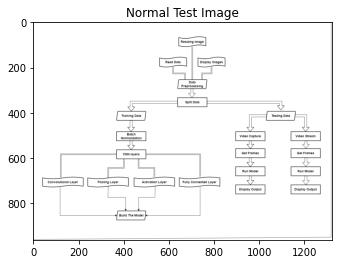

The image does not contain lungs


In [157]:
test_image  = cv2.imread('./wrong_test.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# plot the test image 
plt.imshow(test_image, cmap='gray')
plt.title('Normal Test Image')
plt.show()

if not is_lung_image(test_image):
    print("The image does not contain lungs")
else:
    test_vector = get_img_vector(test_image)

    # get the distances of each test vector with each prototype of each class
    covid_prototype_index, covid_prototype_distance = getPrototype(test_vector, covid_prototypes)
    normal_prototype_index, normal_prototype_distance = getPrototype(test_vector, normal_prototypes)
    pneumonia_prototype_index, pneumonia_prototype_distance = getPrototype(test_vector, pneumonia_prototypes)

    print("\n Class Covid =>","\tPrototype Index: ", covid_prototype_index, "\tPrototype Distance: ", covid_prototype_distance)

    print("\n Class Normal =>","\tPrototype Index: ", normal_prototype_index, "\tPrototype Distance: ", normal_prototype_distance)

    print("\n Class Pneumonia =>","\tPrototype Index: ", pneumonia_prototype_index, "\tPrototype Distance: ", pneumonia_prototype_distance)

    # get the membership of each test vector for each class
    covid_membership = getDegreeOfMembership("covid", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    normal_membership = getDegreeOfMembership("normal", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)
    pneumonia_membership = getDegreeOfMembership("pneumonia", covid_prototype_distance, normal_prototype_distance, pneumonia_prototype_distance)

    print("\n Class Covid =>","\tMembership: ", covid_membership)

    print("\n Class Normal =>","\tMembership: ", normal_membership)

    print("\n Class Pneumonia =>","\tMembership: ", pneumonia_membership)

    # assign class to each test vector
    assigned_class = assignClass(covid_membership, normal_membership, pneumonia_membership)

    print("\n Assigned Class =>", assigned_class)


